In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data visualisation

## 1 - Data loading

In [13]:
movies_filename = 'movies.csv'
ratings_filename = 'ratings.csv'

movies_dataframe = pd.read_csv(
    movies_filename,
    usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})

ratings_dataframe = pd.read_csv(
    ratings_filename,
    usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})


## 2 - Dataframes informations

In [16]:
movies_dataframe.info()
ratings_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


The dataset contains 58098 movies and more than 27M ratings

In [22]:
movies_dataframe.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [24]:
ratings_dataframe.head(10)

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
5,1,1590,2.5
6,1,1591,1.5
7,1,2134,4.5
8,1,2478,4.0
9,1,2840,3.0


### 3 - Rating frequency of movies

Text(0, 0.5, 'ratings number')

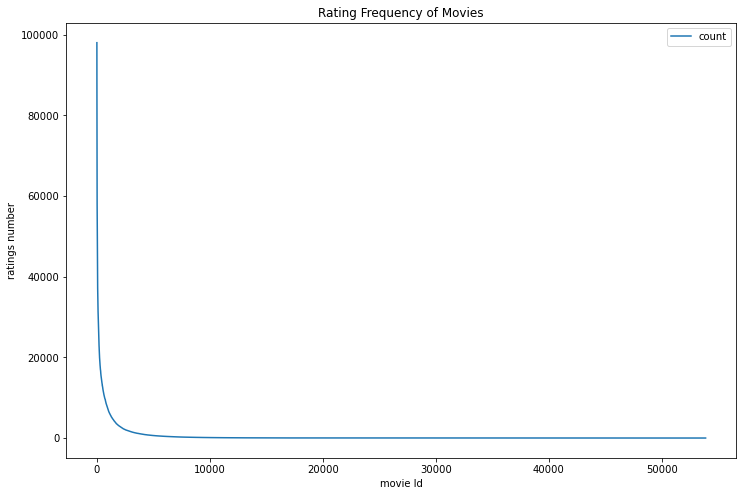

In [39]:
movie_rating_count_dataframe = pd.DataFrame(ratings_dataframe.groupby('movieId').size(), columns=['count'])
ax = movie_rating_count_dataframe \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of Movies'
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("ratings number")

We can observe that a minority of the movies had a massive amount of ratings. Our dataset can be very noisy if we keep the movies which are less rated. 

## 4 - Users rating frequency

Text(0, 0.5, 'ratings number')

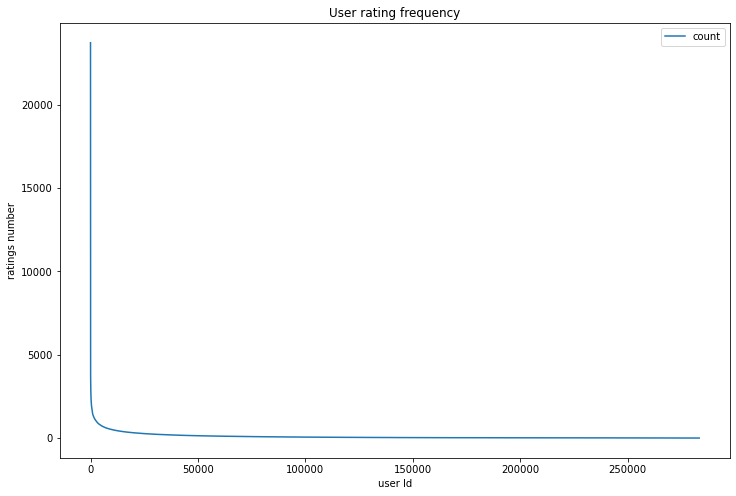

In [43]:
users_rating_count_dataframe = pd.DataFrame(ratings_dataframe.groupby('userId').size(), columns=['count'])
ax = users_rating_count_dataframe \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='User rating frequency',
    )
ax.set_xlabel("user Id")
ax.set_ylabel("ratings number")

Same here, a minority of users are actives.